
    
# **Protein sequence Alignment of TEM-1 with 100 Homologs:** 
- NCBI Blast:sp|P62593.1| "TEM-1_Alignment_100_Homolgs.aln"
- blast search of 100 Proteins
- RefSeq library 

### Results
- class A beta lactamase:
    -|WP_168837987.1|	serine hydrolase [Gammaproteobacteria]
    - 5 serine hydrolases 
    - class A beta lactamases

# **Alignment Analysis** 
1. Alignment Heatmap
2. Calculation of consensus sequence
    2.1 Pei & Grishin
    2.2 Shannon
    2.3 Comparision of both methods
    - Barplot
    - Correlation scatter plot 
3. Correlation of DMS and conservation scores
    - Correlation scatter Plots 
4. Alignment of concensus seqences with TEM1
    4.1 Self calculated concensus sequence 
    4.2 Emboss Concensus Sequence Calculation
    - Blosum62, PAM250
    - Blosum90
    - PAM460
    4.3 Reference Emboss alignment
5. DMS trend at important positions

6. Extended: Hypothesis testing 

        

       


# 1. Calculatuion of Conservation score & modeling concensus sequence


In [1]:
import numpy as np, Bio, matplotlib.pyplot as plot
from matplotlib.ticker import FormatStrFormatter
from Bio import SeqIO
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#Creating the parameters for the heatmap

font = {'family': 'monospace',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

palette = [
    '#C8C8C8', '#145AFF', '#00DCDC', '#E60A0A', '#E6E600',
    '#00DCDC', '#E60A0A', '#EBEBEB', '#8282D2', '#0F820F', 
    '#0F820F', '#145AFF', '#E6E600', '#3232AA', '#DC9682', 
    '#FA9600', '#FA9600', '#B45AB4', '#3232AA', '#0F820F', 
    '#FFFFFF']


aa = 'ARNDCQEGHILKMFPSTWYV-'


# This is the fasta file with the 100 aligned sequences
fasta_file = "TEM-1_Alignment_100_Homolgs.aln"
sequences = SeqIO.to_dict(SeqIO.parse(fasta_file, "fasta"))

#Converting fasta to list with 286 Positions and 
msa = list(SeqIO.parse(fasta_file,'fasta'))
L = len(msa[0].seq)#286 Positions
N = len(msa)#101 rows

#creating empty data frame for the counted amino acids at each position
freq = np.zeros([L,21])
#creating the concemsus sequence
concensus = np.zeros(L)

In [2]:
#counts the amino acids for each position and selects the amino acid with the highest frequency for the concensus sequnece

for i in range(0,N):
    for j in range(0,L):
        j_aa = aa.find(msa[i].seq[j])
        freq[j,j_aa] = freq[j,j_aa] + 1 
for i in range(0, L):
    concensus[i] = freq[i].argmax()



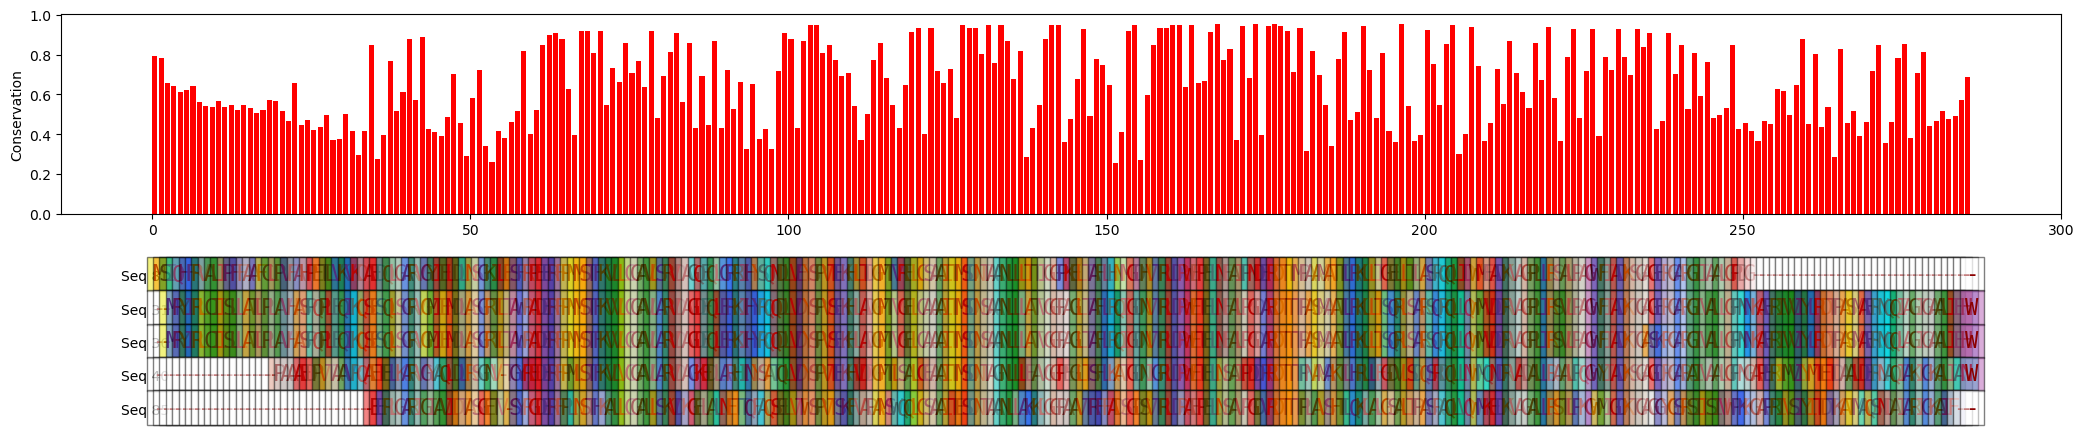

In [3]:
#Heatmap
conservation = np.sqrt(np.sum((np.square(freq/N - 0.05)),axis=1))
figure = plot.figure(figsize=(20,2))
axes = plot.axes([0,0,1,1]);
plot.close()

axes.bar(range(0,L),conservation, align='edge', linewidth = 0, color = 'red')
axes.set_ylabel('Conservation')

spacing_scale = axes.get_ylim()[1]/6
spacing = spacing_scale*2

seq_display = np.sort(np.random.randint(0,N,[5]))

for j in seq_display:
    posit = -float(np.where(seq_display == j)[0]) * spacing_scale - spacing
    axes.text(-5,posit, "Seq "+(str(j+1)))
    for i in range(0, L):
        axes.text(float(i),posit, msa[j].seq[i],
            bbox=dict(facecolor=palette[aa.find(msa[j].seq[i])], alpha=0.5),fontdict=font)
        
figure



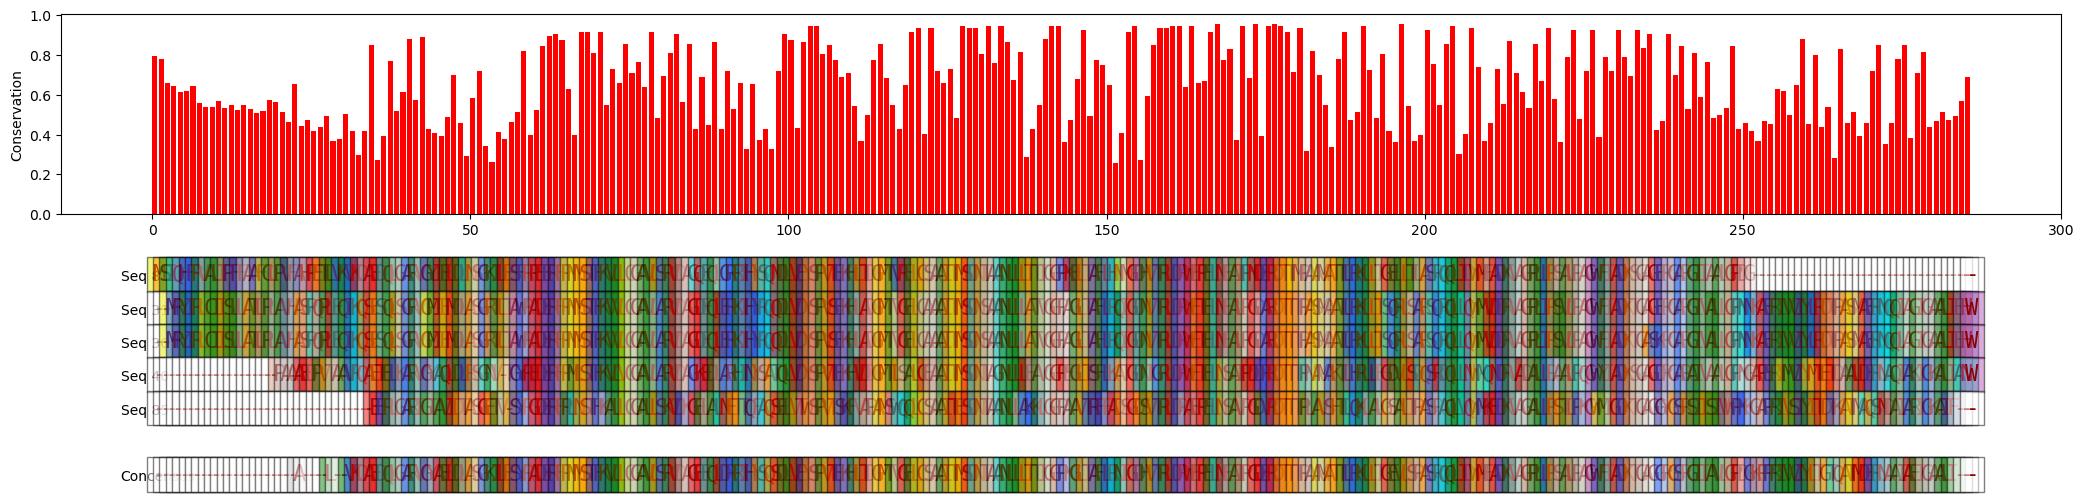

In [4]:
#shows the concensus sequence at the bottom
posit = posit - spacing
axes.text(-5,posit, "Concensus")
for i in range(0, L):
    axes.text(float(i),posit, 'ARNDCQEGHILKMFPSTWYV-'[int(concensus[i])] ,
                bbox=dict(facecolor=palette[int(concensus[i])], 
                alpha=0.5),fontdict=font)
    
figure

## 1.1 Pei & Grishin conservation
Measures the root mean square deviation between the amino acid distribution p~ia and the average amino acid distribution over the whole alignment, which is 1/20 as a range of 20 amino acids can mutate into each position. 

     V = √∑(p_ia/N-E)^2
     max: V = 0 (each a 5x times in alignemnt)
     min: V = 0.95 (total conserved position)







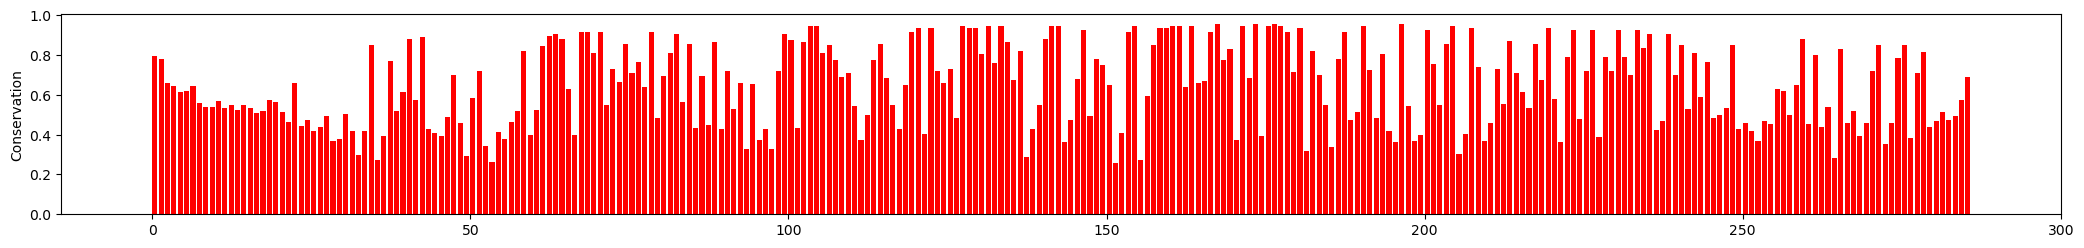

In [5]:
conservation = np.sqrt(np.sum((np.square(freq/N - 0.05)),axis=1))
figure = plot.figure(figsize=(20,2))
axes = plot.axes([0,0,1,1]);
plot.close()

axes.bar(range(0,L),conservation, align='edge', linewidth = 0, color = 'red')
axes.set_ylabel('Conservation')

spacing_scale = axes.get_ylim()[1]/6
spacing = spacing_scale*2

seq_display = np.sort(np.random.randint(0,N,[5]))#

figure

# 1.2 Shannon entropy conservation
The entropy H for each position with amino acid frequency p_ia is:

    H = - ∑p_ialog2(p_ia)
    min: H = 0 (all 100 positions equal)
    max: H = 4.321 (each amino acid occurs 5 times in alignment)

- the negative sum of the logarithmus base two multiplied by the proportion of amino acid a is calculated for each amino acid a = 1-20 





C:\Users\sveam\AppData\Local\Temp\ipykernel_25860\2525825335.py:4: RuntimeWarning: divide by zero encountered in log2
  log_nmb = freq/N* np.log2(freq/N)
C:\Users\sveam\AppData\Local\Temp\ipykernel_25860\2525825335.py:4: RuntimeWarning: invalid value encountered in multiply
  log_nmb = freq/N* np.log2(freq/N)


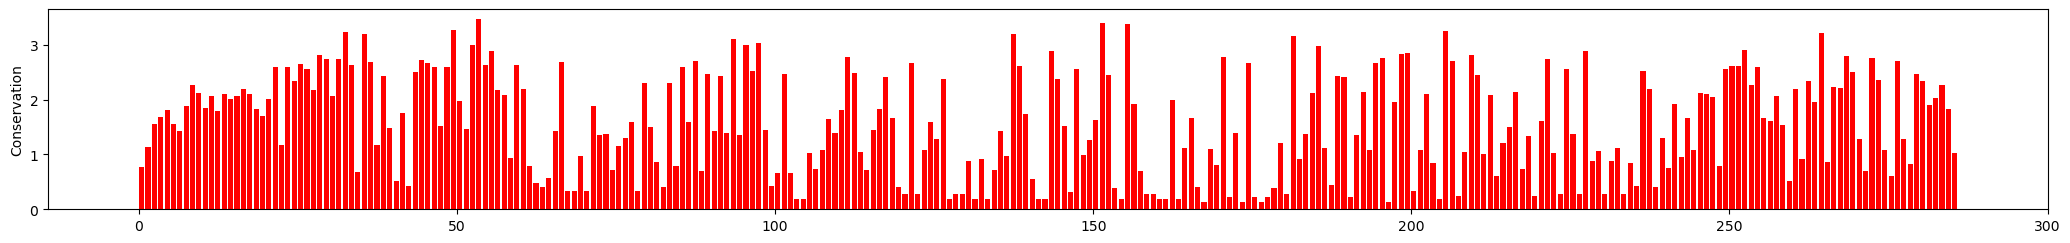

In [6]:
#positions without occurence of one amino acid have values of -inf (value=0, log=-inf )
# convert them to nan
with pd.option_context('mode.use_inf_as_na',True):
    log_nmb = freq/N* np.log2(freq/N)
    log_nmb[ log_nmb == -np.inf] = np.nan 

#ignore nan and calculate the entropy for each position
conservation_Shannon = np.nansum(log_nmb, axis=1,)*-1


figure = plot.figure(figsize=(20,2))
axes = plot.axes([0,0,1,1]);
plot.close()

axes.bar(range(0,L),conservation_Shannon, align='edge', linewidth = 0, color = 'red')
axes.set_ylabel('Conservation')

spacing_scale = axes.get_ylim()[1]/6
spacing = spacing_scale*2

seq_display = np.sort(np.random.randint(0,N,[5]))#Wir wählen nur 5 Alignments

figure

# 1.3 Comparision of Pei & Grishin and Shannon conservation
Differences of the conservation scores: 

- For Pei & Grishin conservation increases with conservation score while the position conservation decreases with increasing shannon score.  

- Shannon entropy measures the amount of disorder for each position which is quite sensitive when there rare amino acids occure.  

- Pei & Grishin conservation is less senistive because the difference between frequencies instead of their ratio is used to measure the variance.

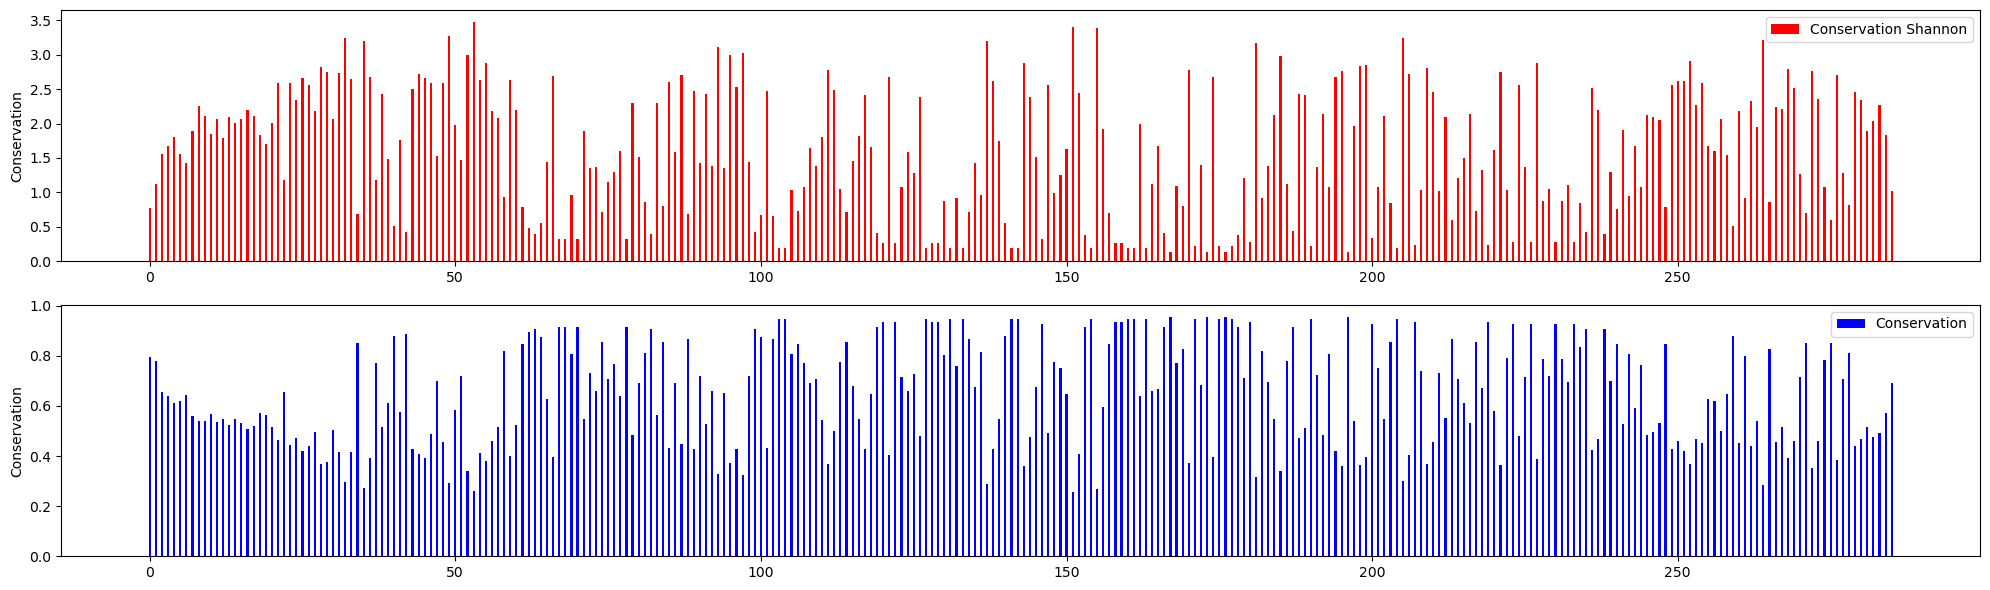

In [7]:
figure = plt.figure(figsize=(20, 6))
axes1 = plt.subplot(211)
axes2 = plt.subplot(212)

width = 0.35  # Breite der Bars
x = np.arange(L)  # X-Koordinaten für die Bars

axes1.bar(x, conservation_Shannon, width, align='center', linewidth=0, color='red', label='Conservation Shannon')
axes1.set_ylabel('Conservation')

axes2.bar(x, conservation, width, align='center', linewidth=0, color='blue', label='Conservation')
axes2.set_ylabel('Conservation')

spacing_scale = axes1.get_ylim()[1] / 6
spacing = spacing_scale * 2

axes1.legend()
axes2.legend()

plt.tight_layout()
plt.show()

For a better comparison the conservation is z-normalizated. 
The scores should be directling opposing to each other, as after z-normalisation the same trend  has the opposite sign.

### Export DMS_Conservation.csv

In [8]:
# Cut signal sequence 0-23 
conservation_core_V = conservation[23:]
conservation_Shannon_cut = conservation_Shannon[23:]

#data frame with mean z normalized position scores
df_mean = pd.read_pickle('position_means.pkl')
df_DMS_Conserv = df_mean[['mean_Stiffler_z', 'mean_Deng_z', 'mean_Firnberg_z', 'mean_all_z']].copy()

#adding conservation scores 
df_DMS_Conserv['Pei&Grishin'] = conservation_core_V
df_DMS_Conserv_S = df_DMS_Conserv.copy()
df_DMS_Conserv_S['Conserved_Shannon'] = conservation_Shannon_cut

print(df_DMS_Conserv_S)


         mean_Stiffler_z mean_Deng_z mean_Firnberg_z mean_all_z  Pei&Grishin  \
Position                                                                       
24              0.786898    0.089304          0.8918   0.577701     0.445044   
25               0.89939    0.180497         0.49345   0.510811     0.471359   
26              0.998662    0.670128        0.906685   0.849455     0.419883   
27             -0.510157   -0.255614       -0.514142  -0.426638     0.439056   
28              0.377421    0.132612        0.090621    0.20849     0.495094   
...                  ...         ...             ...        ...          ...   
282            -0.337803    0.463454       -0.376808  -0.083719     0.515465   
283            -0.106276     0.31609       -0.152312   0.019167     0.475500   
284             0.824699    0.420258        0.974941    0.73577     0.492911   
285              0.57407    0.050248        0.486125   0.368077     0.571215   
286            -1.041095   -1.334869    

In [9]:
#z-normalisation of Shannon conservation und Pei Grishin conservation
df_DMS_Conserv_S_Norm = df_DMS_Conserv_S.copy()

def z_score(column):
    mean = column.mean()
    std = column.std()
    z_scores = (column - mean) / std
    return z_scores


df_DMS_Conserv_S_Norm['Conserved_Shannon'] = z_score(df_DMS_Conserv_S['Conserved_Shannon'])
df_DMS_Conserv_S_Norm['Pei&Grishin'] = z_score(df_DMS_Conserv_S['Pei&Grishin'])

#Dataframe export
df_DMS_Conserv_S_Norm.to_csv('DMS_Conservation.csv', index=False)



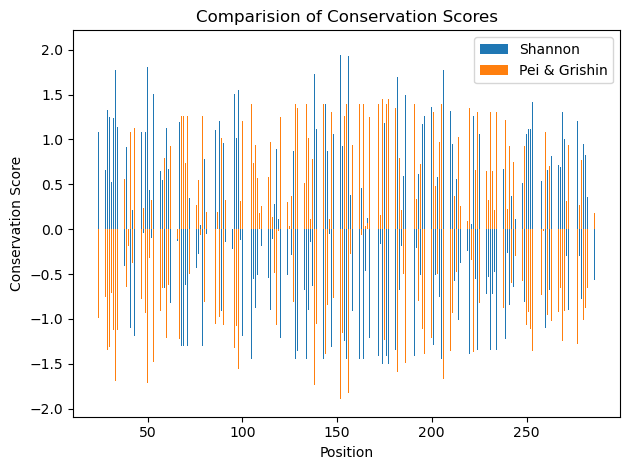

In [10]:
# P&G und Shannon conservation z-normalized
DMS_Conservation  = pd.read_csv('DMS_Conservation.csv')

x = np.arange(24.0, 287.0, 1.0)
width = 0.35
fig, ax = plt.subplots()

rects1 = ax.bar(x, DMS_Conservation['Conserved_Shannon'], width, label='Shannon')
rects2 = ax.bar(x, DMS_Conservation['Pei&Grishin'], width, label='Pei & Grishin')

ax.set_xlabel('Position')
ax.set_ylabel('Conservation Score')
ax.set_title('Comparision of Conservation Scores')
ax.legend()
plt.tight_layout()
plt.show()

The trends of both models differ rarely and are consistent overall. Also the conservation strength seems to be quite equal. 

[[ 1.         -0.99118175]
 [-0.99118175  1.        ]]


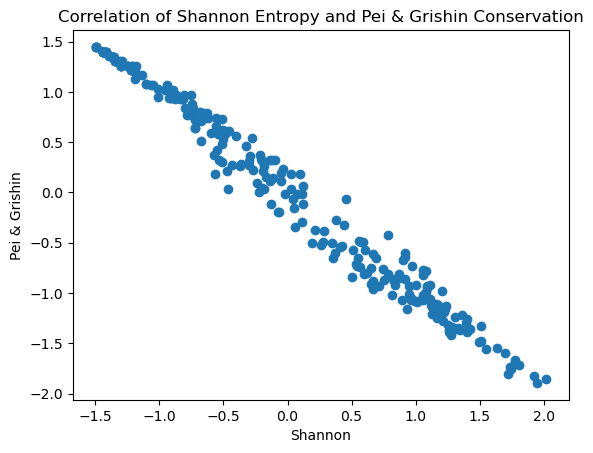

In [11]:
#calculation of correlation score 
corr = np.corrcoef(DMS_Conservation['Conserved_Shannon'], DMS_Conservation['Pei&Grishin'])
print(corr)

plt.scatter(DMS_Conservation['Conserved_Shannon'], DMS_Conservation['Pei&Grishin'])
plt.xlabel('Shannon')
plt.ylabel('Pei & Grishin')
plt.title('Correlation of Shannon Entropy and Pei & Grishin Conservation')
plt.show()

## Results:
The conservation calculation methods correlate strongly r = 0.99118175 and show no huge differneces. 
For further approach we deicided to use the Shannon Entropy as it is more sensitive.  
Considering that our aligned sequences are about 90 % identical.

# 3. Comparision of DMS scores and Conservation scores

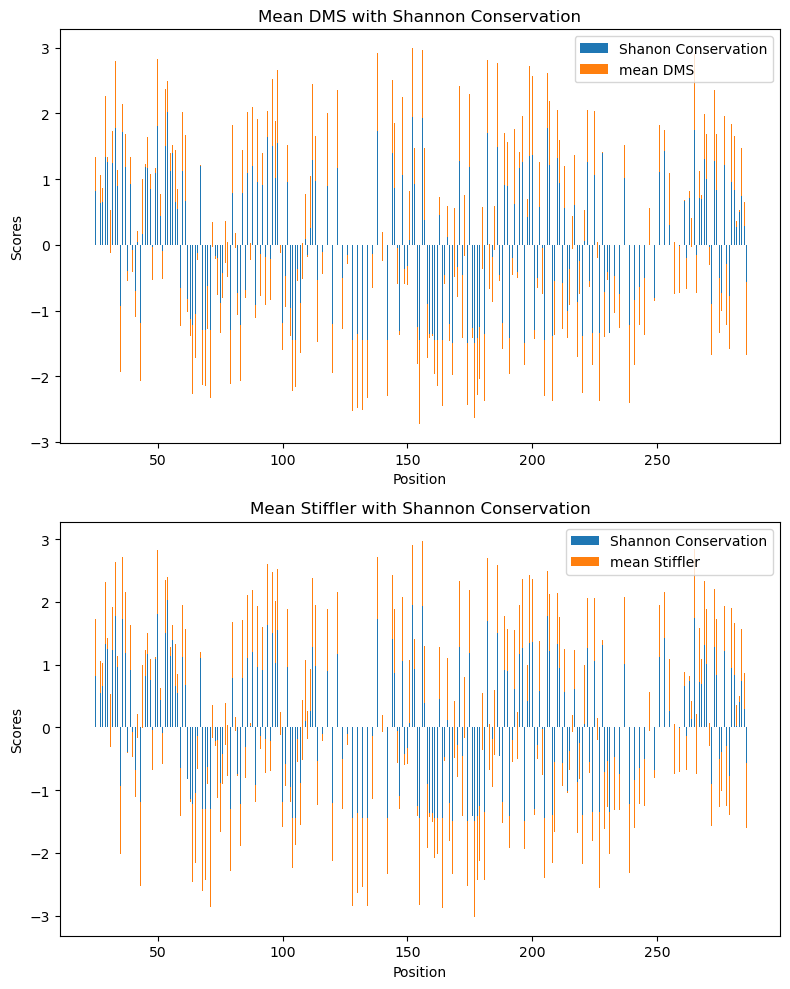

In [12]:

C_df_New = DMS_Conservation.copy()
C_df_New['Position'] = range(24,287)

x = np.arange(24.0, 287.0, 1.0)
width = 0.35

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

rects1 = ax1.bar(x, C_df_New['Conserved_Shannon'], width, label='Shanon Conservation')
rects2 = ax1.bar(x, C_df_New['mean_all_z'], width, bottom=C_df_New['Conserved_Shannon'], label='mean DMS')

ax1.set_xlabel('Position')
ax1.set_ylabel('Scores')
ax1.set_title('Mean DMS with Shannon Conservation')
ax1.legend()

rects3 = ax2.bar(x, C_df_New['Conserved_Shannon'], width, label='Shannon Conservation')
rects4 = ax2.bar(x, C_df_New['mean_Stiffler_z'], width, bottom=C_df_New['Conserved_Shannon'], label='mean Stiffler')

ax2.set_xlabel('Position')
ax2.set_ylabel('Scores')
ax2.set_title('Mean Stiffler with Shannon Conservation')
ax2.legend()

plt.tight_layout()
plt.show()

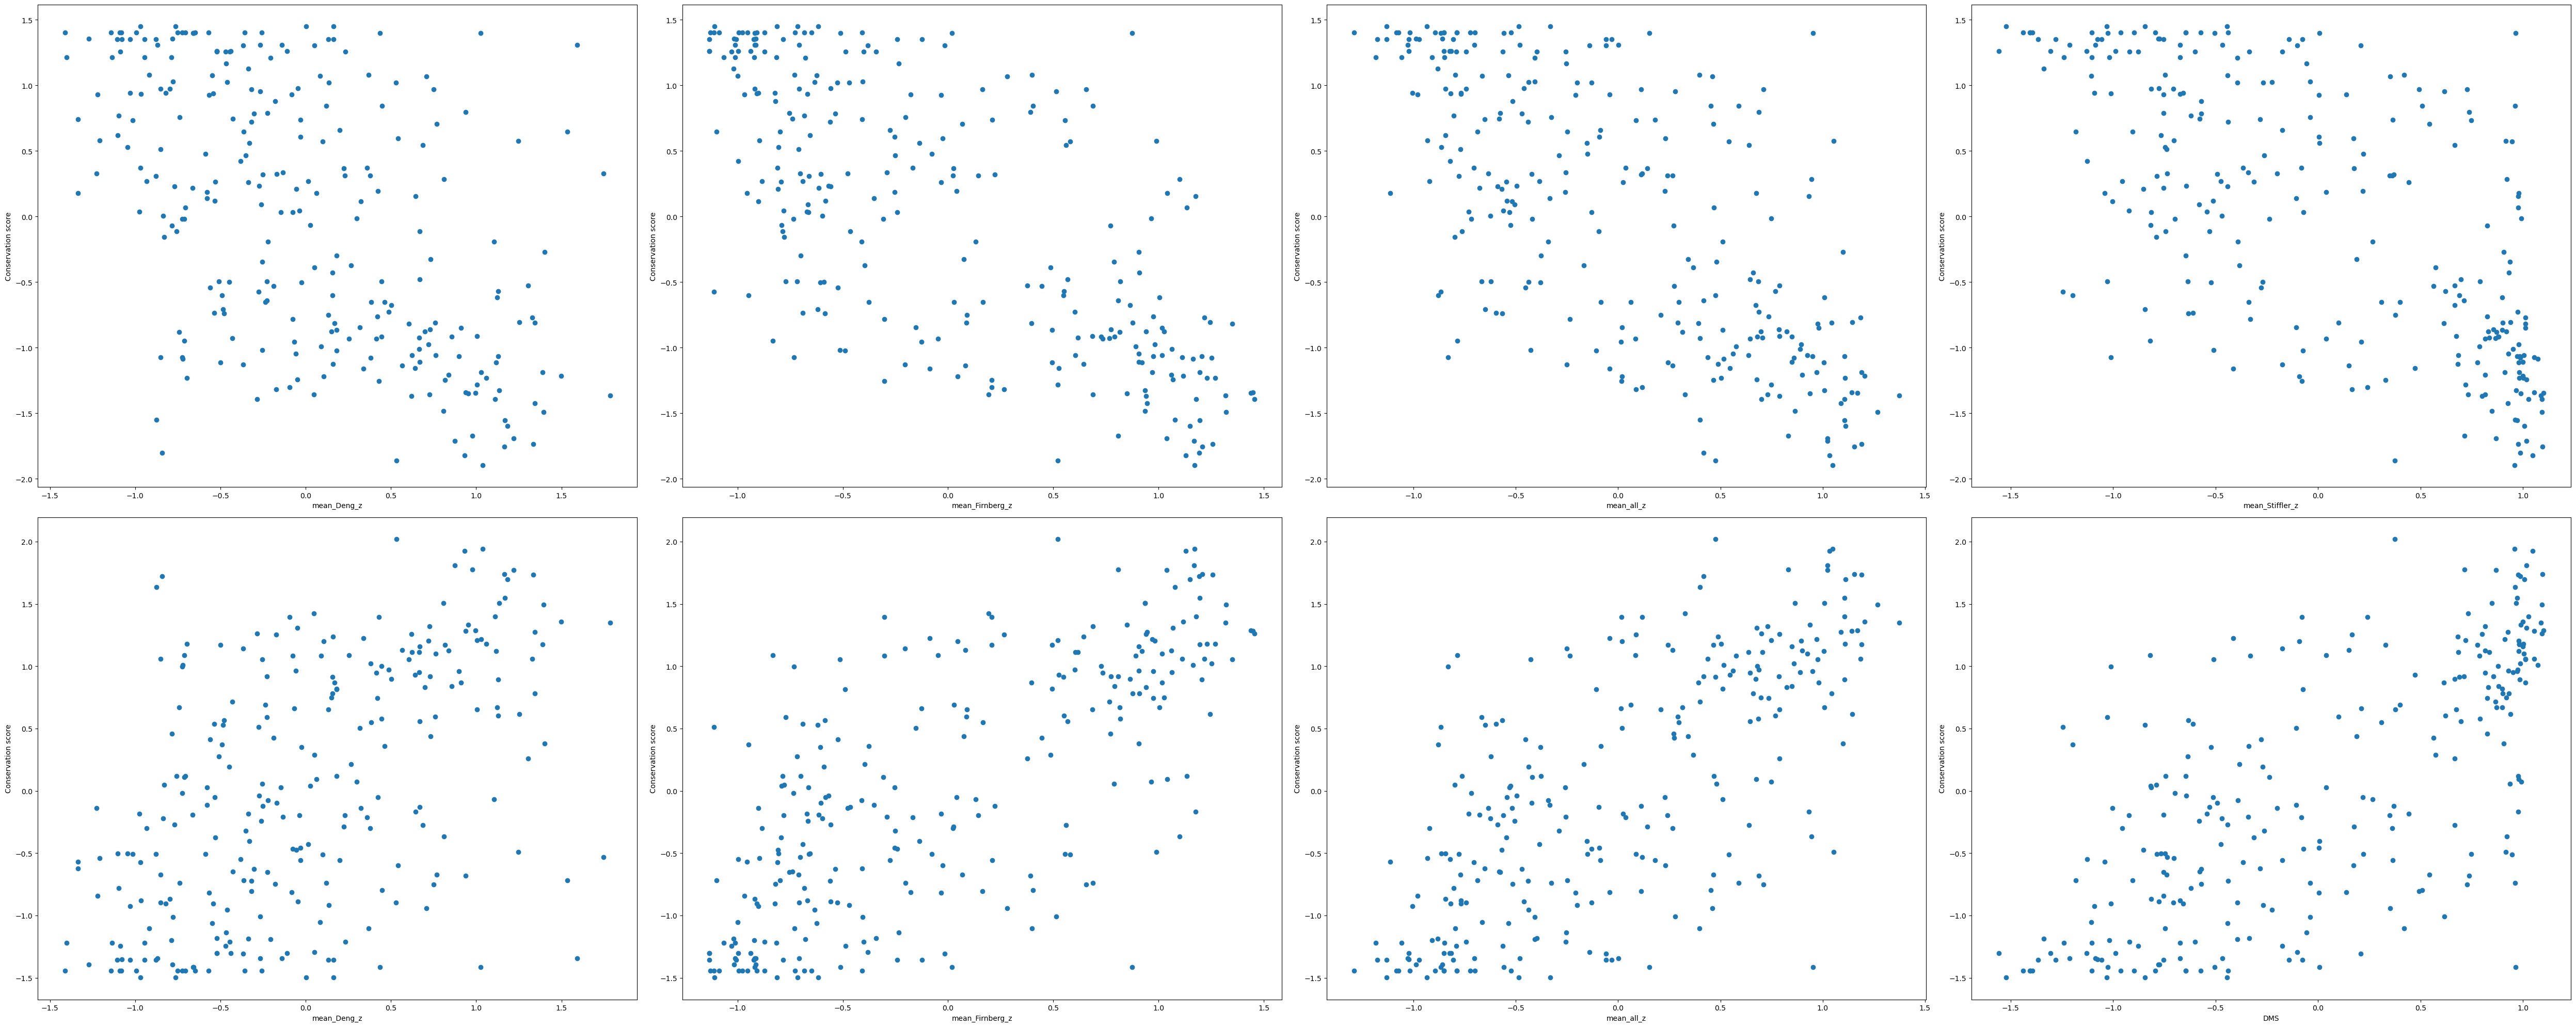

In [13]:
C_df_New = DMS_Conservation.copy()
C_df_New['Position'] = range(24,287)



fig, axs = plt.subplots(2, 4, figsize=(50, 20))

for i, col in enumerate(C_df_New.columns):
    if col == 'Position' or col == 'Pei&Grishin' or col =='Conserved_Shannon':
        continue
    else:
        axs[0,i-1].scatter(C_df_New[col], C_df_New['Pei&Grishin'])
        axs[1,i-1].scatter(C_df_New[col], C_df_New['Conserved_Shannon'])
        axs[0, i-1].set_xlabel(col)  
        axs[0, i-1].set_ylabel('Conservation score')  
        
        axs[1, i-1].set_xlabel(col)  
        axs[1, i-1].set_ylabel('Conservation score')  


plt.xlabel('DMS')
plt.ylabel('Conservation score')
plt.tight_layout()
plt.show()

In [14]:
#Correlation
cor_df = pd.DataFrame(columns =['Shannon', 'Var'])

for col in C_df_New.columns:
    if col == 'Position':
        continue
    else:

        cor_v = C_df_New[col].corr(C_df_New['Pei&Grishin'])
        
        cor_S = C_df_New[col].corr(C_df_New['Conserved_Shannon'])
    
        cor_df = cor_df.append({'Var': cor_v, 'Shannon': cor_S}, ignore_index=True)    

cor_df = cor_df.rename(index={0: 'Stiffler', 1: 'Deng', 2: 'Firnberg', 3: 'Mean', 4 :'variance', 5 : 'Shannon'})
display(cor_df)

#

C:\Users\sveam\AppData\Local\Temp\ipykernel_25860\1673660213.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor_df = cor_df.append({'Var': cor_v, 'Shannon': cor_S}, ignore_index=True)
C:\Users\sveam\AppData\Local\Temp\ipykernel_25860\1673660213.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor_df = cor_df.append({'Var': cor_v, 'Shannon': cor_S}, ignore_index=True)
C:\Users\sveam\AppData\Local\Temp\ipykernel_25860\1673660213.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cor_df = cor_df.append({'Var': cor_v, 'Shannon': cor_S}, ignore_index=True)
C:\Users\sveam\AppData\Local\Temp\ipykernel_25860\1673660213.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futur

,Shannon,Var
Stiffler,0.695290,-0.667150
Deng,0.539352,-0.533125
Firnberg,0.728481,-0.702616
Mean,0.715928,-0.693817
variance,-0.991182,1.000000
Shannon,1.000000,-0.991182


## Correlation scores:
The correlation is nearly identical for Shannon and Pei & Grishin across the data sets.  

The correlation is in range of r =  0.53 - 0.71  

The stiffler data set correlation lays in the middle compared to the other two data sets, therefore it is used together with the merged model for further analysis.

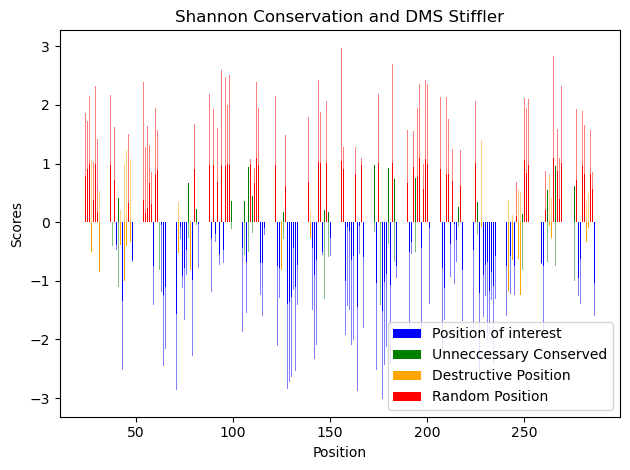

In [15]:
x = np.arange(24.0, 287.0, 1.0)
width = 0.35

fig, ax = plt.subplots()

# Position of interest
ax.bar(x, np.where((C_df_New['mean_Stiffler_z'] < 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['mean_Stiffler_z'], 0),
       width, color='blue', label='Position of interest')

ax.bar(x, np.where((C_df_New['mean_Stiffler_z'] < 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['Conserved_Shannon'], 0),
       width, bottom=np.where((C_df_New['mean_Stiffler_z'] < 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['mean_Stiffler_z'], 0),
       color='blue', alpha=0.5)

# Unneccessary Conserved
ax.bar(x, np.where((C_df_New['mean_Stiffler_z'] > 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['mean_Stiffler_z'], 0),
       width,
       color='green', label='Unneccessary Conserved')

ax.bar(x, np.where((C_df_New['mean_Stiffler_z'] > 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['Conserved_Shannon'], 0),
       width, 
       color='green', alpha=0.5)

# Destructive Position
ax.bar(x, np.where((C_df_New['mean_Stiffler_z'] < 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['mean_Stiffler_z'], 0),
       width, 
       color='orange', label='Destructive Position')

ax.bar(x, np.where((C_df_New['mean_Stiffler_z'] < 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['Conserved_Shannon'], 0),
       width,  
       color='orange', alpha=0.5)

# Random
ax.bar(x, np.where((C_df_New['mean_Stiffler_z'] > 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['mean_Stiffler_z'], 0),
       width, color='red', label='Random Position')

ax.bar(x, np.where((C_df_New['mean_Stiffler_z'] > 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['Conserved_Shannon'], 0),
       width, bottom=np.where((C_df_New['mean_Stiffler_z'] > 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['mean_Stiffler_z'],0 ),
       color='red', alpha=0.5)

ax.set_xlabel('Position')
ax.set_ylabel('Scores')
ax.set_title('Shannon Conservation and DMS Stiffler')
ax.legend()

plt.tight_layout()
plt.show()


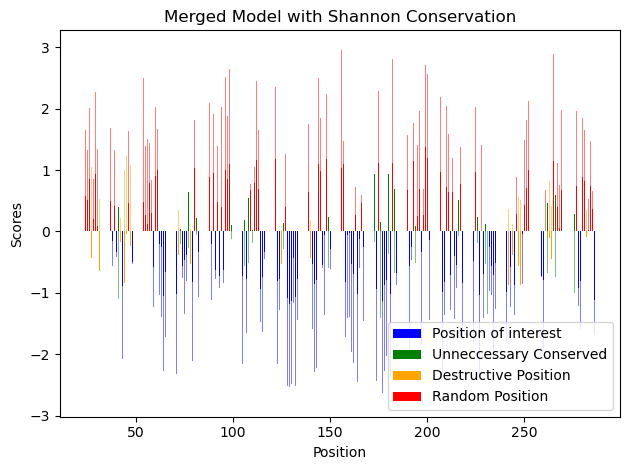

In [16]:
x = np.arange(24.0, 287.0, 1.0)
width = 0.35

fig, ax = plt.subplots()

# Position of interest
ax.bar(x, np.where((C_df_New['mean_all_z'] < 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['mean_all_z'], 0),
       width, color='blue', label='Position of interest')

ax.bar(x, np.where((C_df_New['mean_all_z'] < 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['Conserved_Shannon'], 0),
       width, bottom=np.where((C_df_New['mean_all_z'] < 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['mean_all_z'], 0),
       color='blue', alpha=0.5)

# Unneccessary Conserved
ax.bar(x, np.where((C_df_New['mean_all_z'] > 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['mean_all_z'], 0),
       width,
       color='green', label='Unneccessary Conserved')

ax.bar(x, np.where((C_df_New['mean_all_z'] > 0) & (C_df_New['Conserved_Shannon'] < 0), C_df_New['Conserved_Shannon'], 0),
       width, 
       color='green', alpha=0.5)

# Destructive Position
ax.bar(x, np.where((C_df_New['mean_all_z'] < 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['mean_all_z'], 0),
       width, 
       color='orange', label='Destructive Position')

ax.bar(x, np.where((C_df_New['mean_all_z'] < 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['Conserved_Shannon'], 0),
       width,  
       color='orange', alpha=0.5)

# Random
ax.bar(x, np.where((C_df_New['mean_all_z'] > 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['mean_all_z'], 0),
       width, color='red', label='Random Position')

ax.bar(x, np.where((C_df_New['mean_all_z'] > 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['Conserved_Shannon'], 0),
       width, bottom=np.where((C_df_New['mean_all_z'] > 0) & (C_df_New['Conserved_Shannon'] > 0), C_df_New['mean_all_z'],0 ),
       color='red', alpha=0.5)

ax.set_xlabel('Position')
ax.set_ylabel('Scores')
ax.set_title('Merged Model with Shannon Conservation')
ax.legend()

plt.tight_layout()
plt.show()

## Results:

1. Position of Interest (blue)
    - DMS negative = Fragile 
    - Conservation = Negative
2. Unnecessary conserved Position (green)
    - DMS positive = Robust
    - Conservation = Negative
3. Random Positions
    - DMS positive = Robust
    - Conservation = Positive
4. Destructive Position
    - DMS negative = Fragile
    - Conservation = Positive

Predominant are the positions of interest which support the hypothesesis that fragile positions are conserved.
Unnecessaty conserved positions which are conserved despite high DMS scores which indicates robustness are not very frequent. That supports that conservation only occurs when necessary.
Destructive position contradict that fragility and conservedness correlate and do appear rarely.
Random positions in which mutations can accumulate are nearly as occurent as the positions of interest and might not have as imoportant protein function.




# 4. Alignment of Concensus seqences with TEM1
The concensus sequence is composed by the most frequent amino acids in the given alignment. Therefore evolutionary conservation could be deduced by the concensus sequence which is core of the following analysis. 
The goal is to find correlation between the concensus sequence conservation and the DMS scores.

Alignment score is calculated by the following parameters:
(parameters are taken from biopython)
- match score = 1
- mismatch score = -2
- gap score = -2,5 
- opening gap score = -1

The principle of alignment scores:

The alignment score is a sum of match, mismatch, gap creation, and gap extension scores
     S= Σ of costs (identities, replacements) - Σ of penalties (number of gaps x gap penalties)

Opening gap score:
- the first amino acid or nucleotide inserted/deleted (gap open) found during the alignment  is more significant, than the subsequent ones (gap extension)  
https://seqan.readthedocs.io/en/main/zreferences.html#id24
- appropriate gap scores have been selected over the years by trial and error  
 Pearson, W.R. (1995) "Comparison of methods for searching protein sequence databases." Prhttps://www.ncbi.nlm.nih.gov/BLAST/tutorial/Altschul-1.html#ref13



## 4.1 Self Calculated Concensus sequence:
- self calculated concensus sequence (SCA) by Pei and Grishin formula is aligned with TEM-1
- determination of mismatch positions
- categorisation of mismatch type by bar plot 

            
        


In [17]:
#Translation of the concensussequence in letter code 
aa = 'ARNDCQEGHILKMFPSTWYV-'
concensusseq = []
for z,i in enumerate(concensus):
    letter = aa[int(i)]
    # print(letter)    
    concensusseq.append(letter)

print(concensusseq)


['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', 'A', '-', '-', '-', '-', 'L', '-', '-', 'V', 'K', 'D', 'A', 'E', 'D', 'Q', 'L', 'G', 'A', 'R', 'V', 'G', 'Y', 'A', 'E', 'L', 'D', 'L', 'A', 'S', 'G', 'K', 'I', 'L', 'E', 'S', 'Y', 'R', 'A', 'D', 'E', 'R', 'F', 'P', 'M', 'M', 'S', 'T', 'F', 'K', 'V', 'L', 'L', 'C', 'G', 'A', 'V', 'L', 'S', 'R', 'V', 'D', 'A', 'G', 'E', 'E', 'Q', 'L', 'D', 'R', 'R', 'I', 'H', 'Y', 'S', 'Q', 'S', 'D', 'L', 'V', 'E', 'Y', 'S', 'P', 'V', 'T', 'E', 'K', 'H', 'L', 'T', 'D', 'G', 'M', 'T', 'V', 'G', 'E', 'L', 'C', 'S', 'A', 'A', 'I', 'T', 'M', 'S', 'D', 'N', 'T', 'A', 'A', 'N', 'L', 'L', 'L', 'T', 'T', 'I', 'G', 'G', 'P', 'K', 'G', 'L', 'T', 'A', 'F', 'L', 'R', 'N', 'I', 'G', 'D', 'H', 'V', 'T', 'R', 'L', 'D', 'R', 'W', 'E', 'P', 'E', 'L', 'N', 'E', 'A', 'I', 'P', 'G', 'D', 'E', 'R', 'D', 'T', 'T', 'T', 'P', 'A', 'A', 'M', 'A', 'T', 'T', 'L', 'R', 'K', 'L', 'L', 'T', 'G', 'E', 'V', 'L', 'S', 'P', 'A',

In [43]:
#Alignemnet of Concensus sequence 

from Bio import Align
from Bio import pairwise2
aligner = Align.PairwiseAligner()

#score 
Concensus_Calc = ''.join(concensusseq)
score = pairwise2.align.globalms(Concensus_Calc, msa[0].seq, 1.0, -2.0, -2.5, -1.0)
identical = pairwise2.align.globalms(Concensus_Calc, msa[0].seq, 1.0, 0.0, 0.0, 0.0)
print(score[0].score)
print(identical[0].score)
#score = pairwise2.align.globalms(Concensus_Calc,msa[0].seq, score_only=True, match_score=1.0, mismatch_score=-1.0, gap_score = -1.5)
seq_Conc_Calc = Bio.pairwise2.format_alignment(Concensus_Calc,msa[0].seq, score[0].score, 23,286, full_sequences= False ) 

print(seq_Conc_Calc)


115.0
229.0
 2 ----L--VKDAEDQLGARVGYAELDLASGKILESYRADERFPMMSTFKVLLCGAVLSRVDAGEEQLDRRIHYSQSDLVEYSPVTEKHLTDGMTVGELCSAAITMSDNTAANLLLTTIGGPKGLTAFLRNIGDHVTRLDRWEPELNEAIPGDERDTTTPAAMATTLRKLLTGEVLSPASRQQLIDWMEADKVAGPLLRSALPAGWFIADKTGAGGRGSRGIIAVLGPDGKPPRIVVIYLTGTQATMDERNAAIAEIGAALI---
       |  ||||||||||||||.||||.|||||||.|..||||||||||||||||||||||||.|||.|||||||.|||||||||||||||||||.||||||||||||||||||||||||||.|||||.|.|||||||||||||||||||.||||||.|||||||||||||||.|..|||||||||||||||||||||||||||||||||.|||.||||||||.|||||||.||||||.||.||||||||..||||||.||   
24 HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPAAMATTLRKLLTGELLTLASRQQLIDWMEADKVAGPLLRSALPAGWFIADKSGAGERGSRGIIAALGPDGKPSRIVVIYTTGSQATMDERNRQIAEIGASLIKHW
  Score=115



In [19]:
Concensus_Calc = ''.join(concensusseq)
alignments = pairwise2.align.globalms(Concensus_Calc, msa[0].seq, 1.0, -2.0, -2.5, -1.0)
PG_alignment = alignments[0]

# Get mismatch positions
mismatch_positions_SCA = []
for i, (c1, c2) in enumerate(zip(PG_alignment.seqA, PG_alignment.seqB)):
    if i > 23 and c1 != c2:
        mismatch_positions_SCA.append(i+1)

# Output mismatch positions
print("Mismatch positions with index > 23:")
print(mismatch_positions_SCA)


Mismatch positions with index > 23:
[25, 26, 27, 29, 30, 45, 50, 58, 60, 61, 86, 90, 98, 118, 145, 151, 153, 173, 180, 196, 198, 199, 233, 237, 246, 254, 261, 264, 273, 274, 281, 284, 285, 286]


C:\Users\sveam\AppData\Local\Temp\ipykernel_25860\2487355674.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(mismatch_positions_SCA)
C:\Users\sveam\AppData\Local\Temp\ipykernel_25860\2487355674.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(mismatch_positions_SCA)


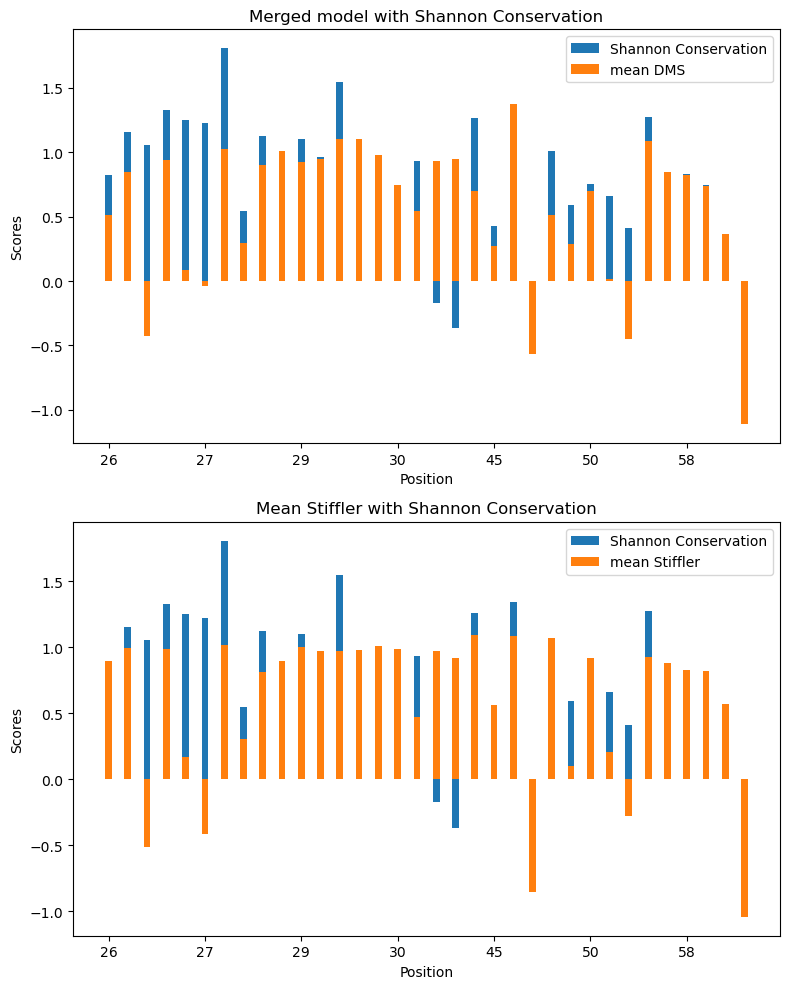

In [23]:
filtered_df_SCA = C_df_New[C_df_New['Position'].isin(mismatch_positions_SCA)]

x = np.arange(len(filtered_df))
width = 0.35

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

rects1 = ax1.bar(x, filtered_df['Conserved_Shannon'], width, label='Shannon Conservation')
rects2 = ax1.bar(x, filtered_df['mean_all_z'], width, label='mean DMS')

ax1.set_xlabel('Position')
ax1.set_ylabel('Scores')
ax1.set_title('Merged model with Shannon Conservation')
ax1.legend()

rects3 = ax2.bar(x, filtered_df_SCA['Conserved_Shannon'], width, label='Shannon Conservation')
rects4 = ax2.bar(x, filtered_df_SCA['mean_Stiffler_z'], width, label='mean Stiffler')

ax1.set_xticklabels(mismatch_positions_SCA)

ax2.set_xticklabels(mismatch_positions_SCA)
ax2.set_xlabel('Position')
ax2.set_ylabel('Scores')
ax2.set_title('Mean Stiffler with Shannon Conservation')
ax2.legend()

plt.tight_layout()
plt.show()


## Results:
Predominantly present are "Random Positions" (DMS and conservation is positive which indicates robustness and variance). Which is consistent with our expectation, as these regions can accumulate mutations without impact.
Positions of interest should be conserved and do not occur, while destructive positions are shown three times.  
That is a good result which supports the hypothesis that conservation correlates with DMS.

Merged model:
 - Destructive positions: 3
 - Positions of interest:0
 - unneccessary conserved:2

Stiffler:
  - Positions of interest:3
  - Destructive positions:0
  - unneccesssary conserved:2


Problems: 
 - no gradual differentiation of the varaince in amino acids distribution, only the most frequent one is taken 
                
Further approach: 
 - calculation of conscensus sequence with alignment matrix from Emboss
                


# 4.2. Emboss Concensus Sequence Calculation
The following matrixes where used for concensus calculation: 
- Blosum62 as it is the most common matrix
- PAM250 for verification of Blosum62 results
- Blosum90 as our aligned sequences have around 90% similarity
- PAM460 for reference of bad alignemnt score values 


### PAM Point Accepted Mutation /Percent Accepted Mutation
1 PAM divergenz between two sequences at position i means that one amino acid at position i mutates to the new amino acid with average of 1/100.


### BLOSUM Block Substitution Matrix
BLOCKS = data base of of highly conserved aligned sequences
representing hundredths of protein groups

The blosum percantage quantifies the congruency within the aligned sequences. As we aligned 100 proteins with around 90% similarity Blosum90 is used for following analysis.





In [24]:
#EMBOSS CONCENSUS EBLOSUM62
with open("emboss_cons_blosum62.txt", "r") as file:
    Conc_E62 = file.read()
    seq_Conc_E62 = Conc_E62.replace("x", "-")
    seq_Conc_E62 = seq_Conc_E62[11:]
print(seq_Conc_E62)

aligner.match_score = 1.0
aligner.mismatch_score = -2.0
aligner.gap_score = -2.5
score = pairwise2.align.globalms(seq_Conc_E62, msa[0].seq, 1.0, -2.0, -2.5, -1.0)
identical = pairwise2.align.globalxx(seq_Conc_E62.strip(),msa[0].seq.strip(), score_only=True)
seq_Conc_Calc = Bio.pairwise2.format_alignment(seq_Conc_E62.strip(),msa[0].seq.strip(), score[0].score, 23,286, full_sequences= False ) 
print(seq_Conc_Calc)
print(score[0].score)
print(identical)





----------------------A----L--VK--E-QLGARVG---LDLSSGK-L-SYR-DERFPM-STFKVLLCGAVLSRVDAGEEQLDRRI-YSQNDLV-YSPVTEKHI-DGMTV-ELC-AAITMSDNTAANLLL-TIGGPK-LTAFLR-IGD-VTRLDRWEPELNEAIPGD-RDTTTP-AMA-TLRKLL-GEVLS--SRQQLV-WM--DKVAGPLLRS-LPAGW-IADKTGAG--GSR-IIAVL-PD-K---IV-IYLT-TEATMDERN--IAEIG-ALI---

 2 ----L--VK--E-QLGARVG---LDLSSGK-L-SYR-DERFPM-STFKVLLCGAVLSRVDAGEEQLDRRI-YSQNDLV-YSPVTEKHI-DGMTV-ELC-AAITMSDNTAANLLL-TIGGPK-LTAFLR-IGD-VTRLDRWEPELNEAIPGD-RDTTTP-AMA-TLRKLL-GEVLS--SRQQLV-WM--DKVAGPLLRS-LPAGW-IADKTGAG--GSR-IIAVL-PD-K---IV-IYLT-TEATMDERN--IAEIG-ALI---
       |  ||  | |||||||   |||.||| | |.| .||||| ||||||||||||||||||.|||.||| ||||||| ||||||||. ||||| ||| ||||||||||||||| |||||| |||||. .|| ||||||||||||||||.| ||||.| ||| |||||| ||.|.  |||||. ||  |||||||||| ||||| ||||.|||  ||| |||.| || |   || ||.| ..|||||||  ||||| .||   
24 HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPAAMATTLRKLLTGELL

In [25]:
#EMBOSS CONCENSUS PAM250
with open("emboss_cons-PAM250.txt", "r") as file:
    Conc_PAM250 = file.read()
    seq_Conc_PAM250 = Conc_PAM250.replace("x", "-")
    seq_Conc_PAM250 = seq_Conc_PAM250[11:]
print(seq_Conc_PAM250)

aligner.match_score = 1.0
aligner.mismatch_score = -2.0
aligner.gap_score = -2.5
score = pairwise2.align.globalxx(seq_Conc_PAM250,msa[0].seq, score_only=True)
seq_Conc_Calc = Bio.pairwise2.format_alignment(seq_Conc_PAM250.strip(),msa[0].seq.strip(), score, 23,286, full_sequences= False ) 
print(seq_Conc_Calc)
print(score)


----------------------A----L--IK--E-QLGGRIG---LDL-SGR-L-GYRPDERFPM-STFKVLLCGAILSRIDAGQEQLDRRIHYSQDDLI-YSPITEKHLGDGMTIGELC-AAITMSDNTAGNLLL-TIGGP-GLTAFLRNMGDHITRLDRWEPELNEAIPGD-RDTTTP-AMATTLRKLLLGEVLT-SSRQQLIDWM--DKVGGPLLRSGLPAGWFIGDKTGAGDHGSRGIIAVL-PDGKPPRIV-IYLTDTQATMDERD--IA-IG-ALI---

 2 ----L--IK--E-QLGGRIG---LDL-SGR-L-GYRPDERFPM-STFKVLLCGAILSRIDAGQEQLDRRIHYSQDDLI-YSPITEKHLGDGMTIGELC-AAITMSDNTAGNLLL-TIGGP-GLTAFLRNMGDHITRLDRWEPELNEAIPGD-RDTTTP-AMATTLRKLLLGEVLT-SSRQQLIDWM--DKVGGPLLRSGLPAGWFIGDKTGAGDHGSRGIIAVL-PDGKPPRIV-IYLTDTQATMDERD--IA-IG-ALI---
       |  .|  | |||.|.|   ||| ||. | ..||.||||| ||||||||||.|||.|||||||.|||||||.||. |||.|||||.||||..||| ||||||||||.|||| ||||| .|||||.|||||.|||||||||||||||.| ||||.| ||||||||||.||.|| .|||||||||  |||.||||||.|||||||.||.|||..|||||||.| |||||.||| ||.|..|||||||.  || || .||   
24 HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPAAMATTLRKLLTGELL

In [26]:
# PAM250 and Blosum62 how strongly do they match ?
aligner.match_score = 1.0
aligner.mismatch_score = -2.0
aligner.gap_score = -2.5
score = pairwise2.align.globalxx(seq_Conc_PAM250,seq_Conc_E62, score_only=True)
seq_Conc_Calc = Bio.pairwise2.format_alignment(seq_Conc_PAM250.strip(),seq_Conc_E62.strip(), score, 23,286, full_sequences= False ) 
print(seq_Conc_Calc)
print(score)

2 ----L--IK--E-QLGGRIG---LDL-SGR-L-GYRPDERFPM-STFKVLLCGAILSRIDAGQEQLDRRIHYSQDDLI-YSPITEKHLGDGMTIGELC-AAITMSDNTAGNLLL-TIGGP-GLTAFLRNMGDHITRLDRWEPELNEAIPGD-RDTTTP-AMATTLRKLLLGEVLT-SSRQQLIDWM--DKVGGPLLRSGLPAGWFIGDKTGAGDHGSRGIIAVL-PDGKPPRIV-IYLTDTQATMDERD--IA-IG-ALI---
  |||||||.||||||||.|.||||||| ||.|||.|| |||||||||||||||||.|||.|||.||||||| |||.||.||||.||||. ||||. ||||||||||||||.||||||||||  |||||| .|| .|||||||||||||||||||||||||||| |||||| ||||.| |||||. |||||||.|||||| ||||| |.||||||  ||| |||||||| |   ||||||| |.||||||.|||| |||||||||
2 ----L--VK--E-QLGARVG---LDLSSGK-L-SYR-DERFPM-STFKVLLCGAVLSRVDAGEEQLDRRI-YSQNDLV-YSPVTEKHI-DGMTV-ELC-AAITMSDNTAANLLL-TIGGPK-LTAFLR-IGD-VTRLDRWEPELNEAIPGD-RDTTTP-AMA-TLRKLL-GEVLS--SRQQLV-WM--DKVAGPLLRS-LPAGW-IADKTGAG--GSR-IIAVL-PD-K---IV-IYLT-TEATMDERN--IAEIG-ALI---
  Score=243

243.0


In [27]:
#EMBOSS CONCENSUS Blosum90
with open("blosum90.txt", "r") as file:
    Conc_B90 = file.read()
    seq_Conc_B90 = Conc_B90.replace("x", "-")
    seq_Conc_B90 = seq_Conc_B90[11:]


score = pairwise2.align.globalms(seq_Conc_B90, msa[0].seq, 1.0, -2.0, -2.5, -1.0)
identical = pairwise2.align.globalxx(seq_Conc_B90,msa[0].seq, score_only=True)
seq_Conc_Calc = Bio.pairwise2.format_alignment(seq_Conc_B90.strip(),msa[0].seq.strip(), score[0].score, 23,286, full_sequences= False ) 
print(seq_Conc_Calc)
print(score[0].score)
print(identical)

 2 -------VK--E-QLGARVG---LD--SGK---SYR-DERFPM-STFK-LLCGAVLSRVDAGQEQLDRRI-YSQ-DLV-YSPVTEKH--DGMTV-ELC-AAITMSDNTAANLLL-TIGGP--LTAFLR-MGD-VTRLDRWEPELNEAIPGD-RDTTTP-AMA-TLRKLL-GE-LT--SRQQLI-WM--DKVAGPLLRS-LPAGW-IADKTGAG--GSR-IIA-L-PD-K---IV-IYLT-TQATMDERN--IA-IG-ALI---
          ||  | |||||||   ||  |||   |.| .||||| |||| |||||||||||||||||.||| ||| ||| ||||||||  ||||| ||| ||||||||||||||| |||||  |||||. ||| ||||||||||||||||.| ||||.| ||| |||||| || ||  |||||| ||  |||||||||| ||||| ||||.|||  ||| ||| | || |   || ||.| .||||||||  || || .||   
24 HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPAAMATTLRKLLTGELLTLASRQQLIDWMEADKVAGPLLRSALPAGWFIADKSGAGERGSRGIIAALGPDGKPSRIVVIYTTGSQATMDERNRQIAEIGASLIKHW
  Score=-1.5

-1.5
193.0


In [28]:
#EMBOSS Concensussequnez zur überprüfung PAM460
with open("emboss_cons-I20230625-175340-0830-54160326-p1m.txt", "r") as file:
    Conc_E = file.read()
    seq_Conc_E = Conc_E.replace("x", "-")
    seq_Conc_E = seq_Conc_E[12:]

print(seq_Conc_E)
aligner.match_score = 1.0
aligner.mismatch_score = -2.0
aligner.gap_score = -2.5
score = pairwise2.align.globalms(seq_Conc_E, msa[0].seq, 1.0, -2.0, -2.5, -1.0)
identical = pairwise2.align.globalxx(seq_Conc_E.strip(),msa[0].seq.strip(), score_only=True)
seq_Conc_Calc = Bio.pairwise2.format_alignment(seq_Conc_E,msa[0].seq, score[0].score, 23,286, full_sequences= False ) 
print(seq_Conc_Calc)
print(score[0].score)
print(identical)



----------------------A--E-L--LKD-EDRLGGRLG---LDLDGGR--DGYRPDERFPL-STFKVLLCGTLLSRVDDGEEDLDRRIHY-EDDLVEYSPVTEKHLGDGLSLGELCDAALTLSDNTAGNLLLD-LGGPKGLTEFLRDLGDHITRLDRWEPELNEGLPGDERDTT-PDAMT-SLRRLLLGDLLTPDSRDHLVDWL-DDRVGGPLLRAGLPDGWFIGDRSGGGDHGSRGVIGLL-PDGRPPWLV-LYLTGSDASLDERDKELAELG-ALI---

 2 --E-L--LKD-EDRLGGRLG---LDLDGGR--DGYRPDERFPL-STFKVLLCGTLLSRVDDGEEDLDRRIHY-EDDLVEYSPVTEKHLGDGLSLGELCDAALTLSDNTAGNLLLD-LGGPKGLTEFLRDLGDHITRLDRWEPELNEGLPGDERDTT-PDAMT-SLRRLLLGDLLTPDSRDHLVDWL-DDRVGGPLLRAGLPDGWFIGDRSGGGDHGSRGVIGLL-PDGRPPWLV-LYLTGSDASLDERDKELAELG-ALI---
     | |  .|| ||.||.|.|   |||..|.  ...||.||||. |||||||||..|||||.|.|.|.||||| ..|||||||||||||.||....|||.||.|.|||||.||||. .||||.||.||...|||.||||||||||||..|.|||||| |.||. .||.||.|.|||..||..|.||. .|.|.|||||..||.||||.|.||.|..||||.|..| |||.|...| .|.|||.|..|||....||.| .||   
24 HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPAAMATTLRKLLTGELLT

In [29]:
#Short validation that the alignment with biopython works (Self- alignment of TEM_1) 
with open("Tem1.txt", "r") as file:
    TEM= file.read()
    TEM_S = TEM[84:]#Title goes to Position 84 

score = pairwise2.align.globalms(TEM_S.strip(),str(msa[0].seq.strip()), 1.0, -2.0, -2.5, -1.0)
identical = pairwise2.align.globalxx(TEM_S.strip(),str(msa[0].seq.strip()), score_only=True)
seq_Conc_Calc_T = Bio.pairwise2.format_alignment(TEM_S.strip(),str(msa[0].seq.strip()), score[0].score, 23,286, full_sequences= False ) 
print(seq_Conc_Calc_T)
print(identical)
print(score[0].score)

#scoring and alignemnt is correct 

24 HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPAAMATTLRKLLTGELLTLASRQQLIDWMEADKVAGPLLRSALPAGWFIADKSGAGERGSRGIIAALGPDGKPSRIVVIYTTGSQATMDERNRQIAEIGASLIKHW
   |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
24 HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPAAMATTLRKLLTGELLTLASRQQLIDWMEADKVAGPLLRSALPAGWFIADKSGAGERGSRGIIAALGPDGKPSRIVVIYTTGSQATMDERNRQIAEIGASLIKHW
  Score=286

286.0
286.0


# Results: 
1. Emboss Concensus Alignments:
- The match scores from all three alignemnts are nearly identical range (193 -195)
- The scores from Blosum62 (score = 2) and PAM250 (score = -1) differ more than Blosum90 (-1.5) an PAM250 which leeds us to asssume that there is a mistake in the alignemnt, as it contradicts that PAM250 and Blosum62 are very similar

- to get reference for the range of alignment scores in negative direction we aligned PAM460
     - the alignment score (scotre = -94.5) differs by 93-96.5 scoring points to the previous
         - it can be conluded that Blosum62,90 and PAM250 concensus sequences nearly have the same quality and the trend above is a result of the huge similarity 

2. Emboss Concensus Alignment (ECA) vs. Self calculated Alignment(SCA):
- With the self calculated concensus sequence we make the mistake of picking only the most frequent amino acids. Whereas the emboss alignemnts calculates the concensus sequence based on mathematical constructed matrixes which sould be more valid.
- But as the match score of the SCA is significantly higher (229) tahn the match scores of ECA (193-195)
we do not have so high cost in the alignemnt itself and the score of SCA (115) is strongly better than of ECA (-1.5 - 1). 

3. Optimisation of concensus sequence by calculating the sequence with emboss Blosum90 and aligning it with emboss Blosum90



# 4.3. Reference Emboss alignment


In [31]:
from Bio import AlignIO
dict = {}
Needle = r'Needle_B90.txt'

sequences = AlignIO.read(Needle, "emboss")
for i, record in enumerate(sequences):
    key = i
    dict[key] = record.seq
print(dict)
#0 = TEM, 1 = Concensus

#Alignment of Blosum90 with TEM-1 from Emboss
alignmentB90 = pairwise2.align.globalms(dict[0].strip(),dict[1].strip(), 1.0, -2.0, -2.5, -1.0)
identical = pairwise2.align.globalxx(dict[0].strip(),dict[1].strip(), score_only=True)
seq_B90_TEM = Bio.pairwise2.format_alignment(dict[0].strip(),dict[1].strip(), alignmentB90[0].score, 23,308, full_sequences= False ) 
print(seq_B90_TEM)
print(alignmentB90[0].score)
print(identical)

{0: Seq('MSIQHFRVALIPFFAAFCLPVFAHPETLVK------------------------...KHW'), 1: Seq('------------------------------xxxxxxxxxxxxxxxxxxxxxxAx...xxx')}
24 HPETLVK------------------------------VKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPAAMATTLRKLLTGELLTLASRQQLIDWMEADKVAGPLLRSALPAGWFIADKSGAGERGSRGIIAALGPDGKPSRIVVIYTTGSQATMDERNRQIAEI
                                        ||..|.|||||||...||..|||...|.|..|||||.||||.|||||||||||||||||.|||.|||.|||.||||||||..|||||.|||.|||||||||||||||.|||||..|||||..|||.||||||||||||||||.|.||||.|.|||.||||||.||.||..||||||.||..||||||||||.|||||.||||.|||..|||.|||.|.||.|...||.||.|..||||||||..||.|
 1 -------xxxxxxxxxxxxxxxxxxxxxxAxxxxxxxVKxxExQLGARVGxxxLDxxSGKxxxSYRxDERFPMxSTFKxLLCGAVLSRVDAGQEQLDRRIxYSQxDLVxYSPVTEKHxxDGMTVxELCxAAITMSDNTAANLLLxTIGGPxxLTAFLRxMGDxVTRLDRWEPELNEAIPGDxRDTTTPxAMAxTLRKLLxGExLTxxSRQQLIxWMxxDKVAGPLLRSxLPAGWxIADKTGAGxxGSRxIIAxLxPDxKxxxIVxIYLTxTQAT

In [ ]:
#gap which needs to be subtracted to get the actuall TEM-1 position
len(str('------------------------------'))


30

In [39]:
#Get  mismatch positions
PG_alignment = alignmentB90[0]
mismatch_position_90= []
for i, (c1, c2) in enumerate(zip(PG_alignment.seqA, PG_alignment.seqB)):
    if i > 59 and c1 != c2:
        mismatch_position_90.append(i+1-30)
        
print("Mismatch positions with index > 23:")
print(mismatch_position_90)


Mismatch positions with index > 23:
[31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 63, 64, 66, 74, 75, 76, 79, 80, 84, 85, 86, 88, 90, 91, 97, 102, 120, 124, 128, 132, 141, 142, 148, 152, 168, 174, 175, 181, 182, 186, 203, 205, 210, 212, 216, 223, 226, 229, 230, 237, 240, 241, 252, 258, 263, 267, 268, 272, 276, 278, 281, 283, 284, 285, 288, 291, 293, 294, 303, 304, 307, 310, 311, 314, 315, 316]


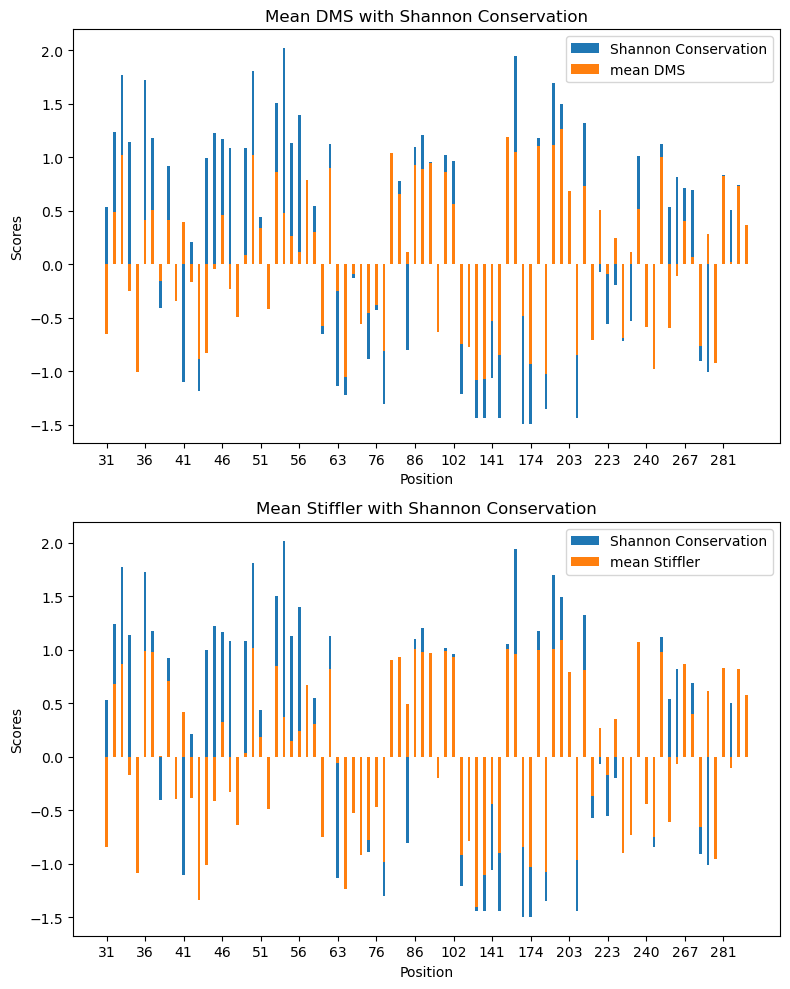

In [41]:
filtered_df = C_df_New[C_df_New['Position'].isin(mismatch_position_90)]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))
x = np.arange(len(filtered_df))
width = 0.35

rects1 = ax1.bar(x, filtered_df['Conserved_Shannon'], width, label='Shannon Conservation')
rects2 = ax1.bar(x, filtered_df['mean_all_z'], width, label='mean DMS')

ax1.set_xlabel('Position')
ax1.set_ylabel('Scores')
ax1.set_title('Mean DMS with Shannon Conservation')
ax1.legend()

rects3 = ax2.bar(x, filtered_df['Conserved_Shannon'], width, label='Shannon Conservation')
rects4 = ax2.bar(x, filtered_df['mean_Stiffler_z'], width, label='mean Stiffler')


tick_positions = np.arange(0, len(filtered_df), 5)  
tick_labels = [mismatch_position_90[i] for i in tick_positions]

ax1.set_xticks(tick_positions)
ax1.set_xticklabels(tick_labels)
ax2.set_xticks(tick_positions)
ax2.set_xticklabels(tick_labels)
ax2.set_xlabel('Position')
ax2.set_ylabel('Scores')
ax2.set_title('Mean Stiffler with Shannon Conservation')
ax2.legend()

plt.tight_layout()
plt.show()



## Results

  Alignment score = 25 
  Matches = 222

Compared to the previous blosum90 alignment, both the match score and the alignemnt score are higher and indicate a better alignment.

The bar plots of stiffler and the mean model are mostly consistent. But no uniform trend can be determined, in contrast to the SCA plot, as random positions and positions of interest are equaly present. While random positions are consistent with our hypothesis, the huge number of positions of interest conflicts with the fact that they should not occure in the mismatch group. Moreover destructive positions and rarely unneccessary positions are also found in the mismatch group.  

Merged model:
 - Destructive positions: 6
 - unneccessary conserved:3

Stiffler:
  - Destructive positions:8
  - unneccesssary conserved:3

# 5. DMS trend at important positions

Important positions which are expected to be conserved and fragile: 
- Active site : 68,166
- Binding site: 232-234
- Disulfid bond: 75-121

    

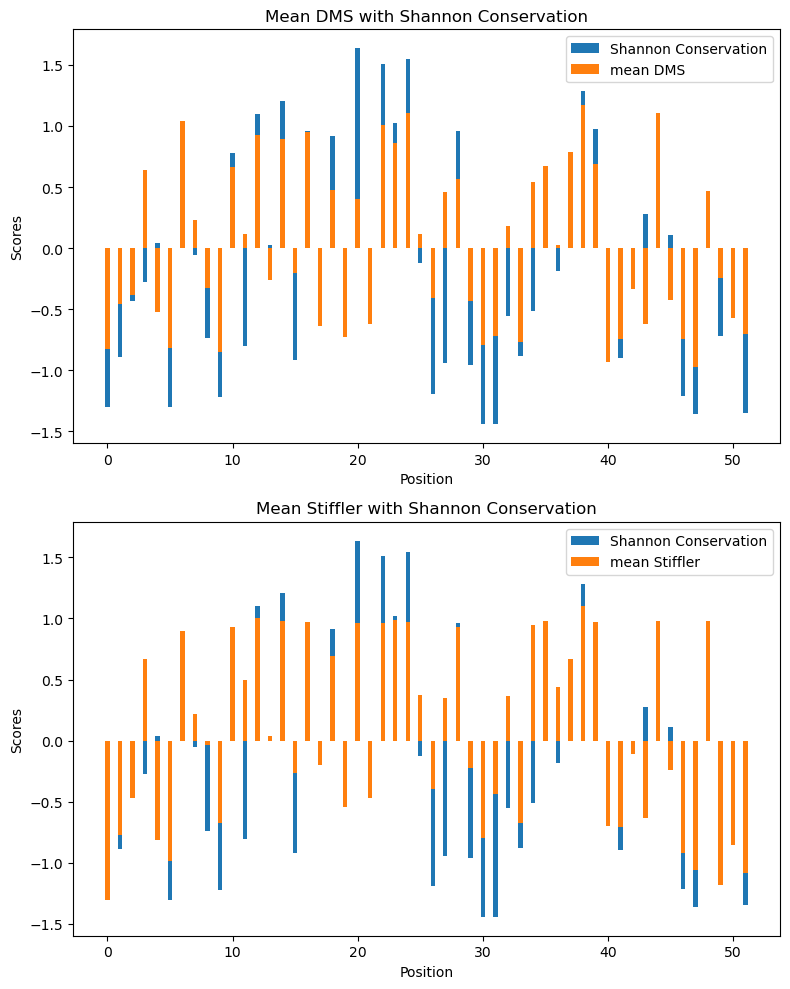

In [ ]:
# Positions
active_site = [68, 166]
binding_site = list(range(232, 235))  
disulfid_bond = list(range(75, 122))  
positions = active_site + binding_site + disulfid_bond

filtered_df = C_df_New[C_df_New['Position'].isin(positions)]


x = np.arange(len(filtered_df))
width = 0.35

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

rects1 = ax1.bar(x, filtered_df['Conserved_Shannon'], width, label='Shannon Conservation')
rects2 = ax1.bar(x, filtered_df['mean_all_z'], width, label='mean DMS')

ax1.set_xlabel('Position')
ax1.set_ylabel('Scores')
ax1.set_title('Mean DMS with Shannon Conservation')
ax1.legend()

rects3 = ax2.bar(x, filtered_df['Conserved_Shannon'], width, label='Shannon Conservation')
rects4 = ax2.bar(x, filtered_df['mean_Stiffler_z'], width, label='mean Stiffler')


ax2.set_xlabel('Position')
ax2.set_ylabel('Scores')
ax2.set_title('Mean Stiffler with Shannon Conservation')
ax2.legend()

plt.tight_layout()
plt.show()

Both barplots are predominantly composed of random positions and positions of interest. The proportion of destructive position is negligible low, similar to the rarely frequent unnecessary conserved positions. 

Merged model:
 - Destructive positions: 4
 - unneccessary conserved:5

Stiffler:
  - Destructive positions:3
  - unneccesssary conserved:7

In [ ]:
# Calculation of the average DMS
mean_by_column = C_df_New.loc[C_df_New['Position'].isin(positions)].mean()
print(mean_by_column)



mean_Stiffler_z        0.063633
mean_Deng_z           -0.062993
mean_Firnberg_z       -0.003927
mean_all_z             0.000635
Pei&Grishin            0.171609
Conserved_Shannon     -0.131827
Position             106.519231
dtype: float64


## Results:
We expected that functional and structural important positions have higbh conservation and low DMS and belong to the category of positions of interest. 
In the bar plot the proportion of positions of interest is quite equal to the proportion of random positions which have low conservation but high robustness. 

DMS:
Overall there is a high proportion of robust positions which contradicts our hypothesis, that important positions are fragile. 
The mean DMS values of the important positions lay around -0.063 to 0.063. Which is close to mean fitness, so we can not approve our expectation, that the DMS is more negative in this regions.

Conservation:
To be recognized on the conservation scores which lay around 0 (mean conservation) it can not be confirmed that important positions are higher or lower conserved as other positions.

    mean_Stiffler_z        0.063633
    mean_Deng_z           -0.062993
    mean_Firnberg_z       -0.003927
    mean_all_z             0.000635

    Pei&Grishin            0.171609
    Conserved_Shannon     -0.131827

# Extended Hypothesis testing 
1. assign each position as match or mismatch by the blosum62 matrix
2. check for normal distribution within the assigned position groups
3. Apply wilcoxon signed ranked test 

In [ ]:
def process_alignment(alignments):
    
    lines = alignments.strip().split('\n')
    alignment_lines = lines[0:3]
    seq1 = alignment_lines[0]
    seq2 = alignment_lines[2]

    df = pd.DataFrame(columns=['Position', 'Blossum62', 'TEM-1', 'Status'])

    for i in range(len(seq1)):
        aa1 = seq1[i]
        aa2 = seq2[i]

        if aa1 == aa2:
            status = 'Identical'
        elif aa1 == '-' or aa2 == '-':
            status = 'Gap'
        else:
            status = 'Different'

        df = df.append({'Position': i+1, 'Blossum62': aa1, 'TEM-1': aa2, 'Status': status}, ignore_index=True)

    return df

result = process_alignment(seq_Bl62_TEM)

Concen_Align_Result = result.copy()

print(result)

C:\Users\sveam\AppData\Local\Temp\ipykernel_22244\345831896.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Position': i+1, 'Blossum62': aa1, 'TEM-1': aa2, 'Status': status}, ignore_index=True)
C:\Users\sveam\AppData\Local\Temp\ipykernel_22244\345831896.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Position': i+1, 'Blossum62': aa1, 'TEM-1': aa2, 'Status': status}, ignore_index=True)
C:\Users\sveam\AppData\Local\Temp\ipykernel_22244\345831896.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Position': i+1, 'Blossum62': aa1, 'TEM-1': aa2, 'Status': status}, ignore_index=True)
C:\Users\sveam\AppData\Local\Temp\ipykernel_22244\345831896.py:21: FutureWarning: The

    Position Blossum62 TEM-1     Status
0          1         2        Different
1          2         3     2  Different
2          3                  Identical
3          4         -     x        Gap
4          5         -     x        Gap
..       ...       ...   ...        ...
283      284         L     L  Identical
284      285         I     I  Identical
285      286         K     x  Different
286      287         H     x  Different
287      288         W     x  Different

[288 rows x 4 columns]


C:\Users\sveam\AppData\Local\Temp\ipykernel_22244\345831896.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Position': i+1, 'Blossum62': aa1, 'TEM-1': aa2, 'Status': status}, ignore_index=True)
C:\Users\sveam\AppData\Local\Temp\ipykernel_22244\345831896.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Position': i+1, 'Blossum62': aa1, 'TEM-1': aa2, 'Status': status}, ignore_index=True)
C:\Users\sveam\AppData\Local\Temp\ipykernel_22244\345831896.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Position': i+1, 'Blossum62': aa1, 'TEM-1': aa2, 'Status': status}, ignore_index=True)
C:\Users\sveam\AppData\Local\Temp\ipykernel_22244\345831896.py:21: FutureWarning: The

Problem = Code is shifted so that the positions are not consistent with the positions of the DMS scores

In [ ]:

df_mean = pd.read_pickle('position_means.pkl')

df_mean_c = df_mean[['mean_Stiffler_z', 'mean_Deng_z', 'mean_Firnberg_z', 'mean_all_z']].copy()

Concen_Align_Result['mean'] = df_mean_c['mean_all_z']
Concen_Align_Result['Stiffler'] = df_mean['mean_Stiffler_z'].shift(-1)

Concen_Align_Result = Concen_Align_Result.reset_index(drop=True)


#NAn im Bereich 0:23
Concen_Align_Result_short = Concen_Align_Result.iloc[23:286,:6]
print(Concen_Align_Result_short)
print (df_mean_c)

    Position Blossum62 TEM-1     Status      mean  Stiffler
23        24         -     x        Gap       NaN       NaN
24        25         A     A  Identical  0.577701   0.89939
25        26         H     x  Different  0.510811  0.998662
26        27         P     x  Different  0.849455 -0.510157
27        28         E     x  Different -0.426638  0.377421
..       ...       ...   ...        ...       ...       ...
281      282         A     x  Different  0.824915 -0.337803
282      283         S     A  Different -0.083719 -0.106276
283      284         L     L  Identical  0.019167  0.824699
284      285         I     I  Identical   0.73577   0.57407
285      286         K     x  Different  0.368077 -1.041095

[263 rows x 6 columns]
         mean_Stiffler_z mean_Deng_z mean_Firnberg_z mean_all_z
Position                                                       
24              0.786898    0.089304          0.8918   0.577701
25               0.89939    0.180497         0.49345   0.510811


# E2. Shapiro test 

In [ ]:
data_identical = Concen_Align_Result_short[Concen_Align_Result_short['Status'] == 'Identical']['mean']
data_different = Concen_Align_Result_short[Concen_Align_Result_short['Status'] == 'Different']['mean']

from scipy.stats import shapiro
#Normalverteilung überprüfen
# Extrahiere die Daten aus der Spalte in ein separates Array
data = Concen_Align_Result_short['mean'].dropna()  

# Führe den Shapiro-Wilk-Test durch
statistic, p_value = shapiro(data)

print('Shapiro-Wilk-Test Statistik:', statistic)
print('Shapiro-Wilk-Test p-Wert:', p_value)


data = data_different

# Führe den Shapiro-Wilk-Test durch
statistic, p_value = shapiro(data)

# Gib die Testergebnisse aus
print('Shapiro-Wilk-Test Statistik:', statistic)
print('Shapiro-Wilk-Test p-Wert:', p_value)

Shapiro-Wilk-Test Statistik: 0.9446558356285095
Shapiro-Wilk-Test p-Wert: 2.193244874604261e-08
Shapiro-Wilk-Test Statistik: 0.9497892260551453
Shapiro-Wilk-Test p-Wert: 0.007625223137438297


# Results from Shapiro test: 
- no normal distribution in the assigned position groups

# E3. Wilcoxon Rank Sum Test 
Testing if groups of match and mismatch positions show group specific trends or when H0 is true they have the same DMS score distribution. 

H0 = No difference in the distribution of DMS scores in match and mismatch positions with the concensus sequence
- Two sided test

Problem:
Not the same size of both groups
- matches = 193 
- mismatches = 69

Approach:
Random loop which picks 69 values in the match group:  
  

In [ ]:
import random
from scipy.stats import wilcoxon



num_iterations = 15000
test_statistics = []
p_values = []

for _ in range(num_iterations):
    # Zufällige 69 Werte auswählen aus Identical 
    random_identical_data = random.sample(list(data_identical ), 69)

    # Wilcoxon-Test durchführen
    statistic, p_value = wilcoxon(random_identical_data, data_different)

    # Teststatistik und p-Wert speichern
    test_statistics.append(statistic)
    p_values.append(p_value)

# Mittelwert der Teststatistik berechnen
mean_test_statistic = sum(test_statistics) / len(test_statistics)

# Durchschnittsp-Wert über die Iterationen berechnen
mean_p_value = sum(p_values) / len(p_values)

print(f"Durchschnittliche Teststatistik: {mean_test_statistic}")
print(f"Durchschnittlicher p-Wert: {mean_p_value}")

Durchschnittliche Teststatistik: 1122.7414
Durchschnittlicher p-Wert: 0.6396286728924532


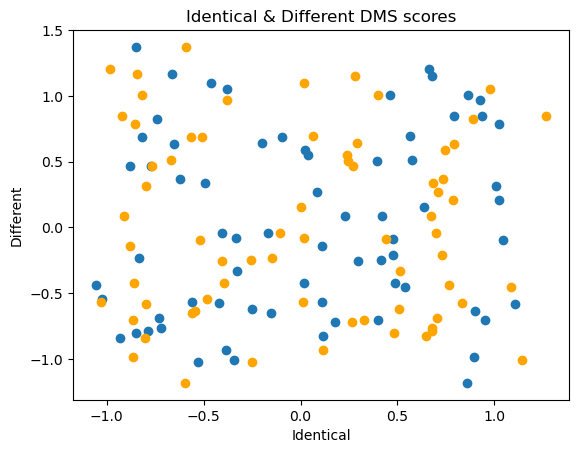

In [ ]:
plt.scatter(data_identical[0:69], data_different)
plt.scatter(data_identical[124:193], data_different, color = 'orange')
plt.xlabel('Identical')
plt.ylabel('Different')
plt.title('Identical & Different DMS scores')
plt.show()

# Result: 

 1000 Runs: 
     - Durchschnittliche Teststatistik: 1124.909
     - Durchschnittlicher p-Wert: 0.6478203616373306

    10000 Runs:
     - Durchschnittliche Teststatistik: 1122.9197
     - Durchschnittlicher p-Wert: 0.641155545963515

     15000 Runs: 
    -  Durchschnittliche Teststatistik: 1123.9102666666668
    - Durchschnittlicher p-Wert: 0.6434579695313134

    18000 Runs: 
    - Durchschnittliche Teststatistik: 1122.7196666666666
    - Durchschnittlicher p-Wert: 0.6405447963911712

p-value is no significant and H0 can not be rejected
  - we can not apptrove by concensus matrix that there is a different distribution of DMS in match and mismatch positions 
    